# ---------------------------------------------------------------------
# ESTIMACIÓN DE LOS COEFICIENTES DE REGRESIÓN POR EL MÉTODO MATRICIAL
# ---------------------------------------------------------------------

In [1]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import matplotlib
# import seaborn

In [2]:
#Importamos data desde github
data_url = 'https://raw.githubusercontent.com/cmdlinetips/data/master/cars.tsv'
cars = pd.read_csv(data_url, sep="\t")

In [3]:
print(cars.head(3))

   speed  dist
0      4     2
1      4    10
2      7     4


Nuestro objetivo será construir un modelo para conocer la relación entre la distancia y la velocidad que puede generar un automóvil

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Distances taken to stop (feet)')

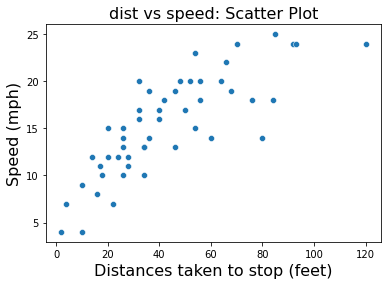

In [4]:
#Graficamos la relación entre dos variables
bplot= sns.scatterplot('dist','speed',data=cars) #Construye una gráfica tipo scatter
bplot.axes.set_title("dist vs speed: Scatter Plot", fontsize=16) #Pone el título
bplot.set_ylabel("Speed (mph)", fontsize=16) #Pone la leyenda del ehe Y
bplot.set_xlabel("Distances taken to stop (feet)", fontsize=16) #Pone la leyenda del eje X

Vemos que puede existir una correlación positiva entre las dos variables

In [5]:
# Asignamos nuestras variables de estudio

X = cars.dist.values

Y = cars.speed.values

Nuestros datos van a venir dados por dublas de valores Xi, Yi

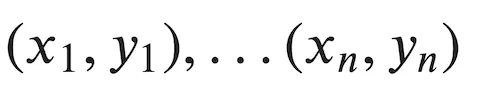

El modelo deberá tener la siguiente forma para ser considerado un modelo de regresión líneal

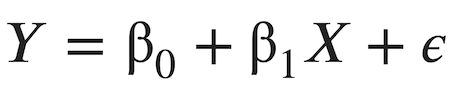

Para poder construir el modelo, tenemos que insertarle una columna de 1s al vector X de la siguiente forma:

In [6]:
X_mat=np.vstack((np.ones(len(X)), X)).T
print(X_mat)
print(X_mat.shape)

[[  1.   2.]
 [  1.  10.]
 [  1.   4.]
 [  1.  22.]
 [  1.  16.]
 [  1.  10.]
 [  1.  18.]
 [  1.  26.]
 [  1.  34.]
 [  1.  17.]
 [  1.  28.]
 [  1.  14.]
 [  1.  20.]
 [  1.  24.]
 [  1.  28.]
 [  1.  26.]
 [  1.  34.]
 [  1.  34.]
 [  1.  46.]
 [  1.  26.]
 [  1.  36.]
 [  1.  60.]
 [  1.  80.]
 [  1.  20.]
 [  1.  26.]
 [  1.  54.]
 [  1.  32.]
 [  1.  40.]
 [  1.  32.]
 [  1.  40.]
 [  1.  50.]
 [  1.  42.]
 [  1.  56.]
 [  1.  76.]
 [  1.  84.]
 [  1.  36.]
 [  1.  46.]
 [  1.  68.]
 [  1.  32.]
 [  1.  48.]
 [  1.  52.]
 [  1.  56.]
 [  1.  64.]
 [  1.  66.]
 [  1.  54.]
 [  1.  70.]
 [  1.  92.]
 [  1.  93.]
 [  1. 120.]
 [  1.  85.]]
(50, 2)


In [7]:
X_mat[0:5,]


array([[ 1.,  2.],
       [ 1., 10.],
       [ 1.,  4.],
       [ 1., 22.],
       [ 1., 16.]])

Estimaremos los coeficientes de la regresión por el método matricial

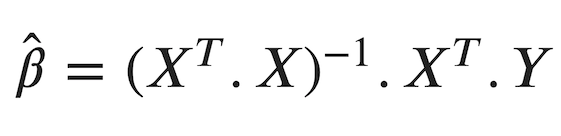

In [8]:
#Construimos el modelo
#np.linalg.inv = calcula la inversa de una matriz
#dot = producto matricial
#notese que la multiplicación de matrices no es permutable

beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(Y)

In [9]:
beta_hat

#la primera posición del arreglo es B0 y la segunda posición es B1

array([8.28390564, 0.16556757])

Y = 8.28 + 0.16X + e

In [15]:
y_barr=X_mat.mean()
y_barr

21.99

In [16]:
# predicción de nuevas observaciones
X_m = X_mat

yhat = X_m.dot(beta_hat)

print(yhat)
print(yhat.shape)

[ 8.61504079  9.93958139  8.94617594 11.92639228 10.93298684  9.93958139
 11.26412199 12.58866258 13.91320318 11.09855441 12.91979773 10.60185169
 11.59525713 12.25752743 12.91979773 12.58866258 13.91320318 13.91320318
 15.90001408 12.58866258 14.24433833 18.21796012 21.52931161 11.59525713
 12.58866258 17.22455467 13.58206803 14.90660863 13.58206803 14.90660863
 16.56228437 15.23774378 17.55568982 20.86704131 22.19158191 14.24433833
 15.90001408 19.54250072 13.58206803 16.23114922 16.89341952 17.55568982
 18.88023042 19.21136557 17.22455467 19.87363587 23.51612251 23.68169008
 28.1520146  22.35714949]
(50,)


In [25]:
v_y_barr=np.linspace(y_barr,y_barr,yhat.shape[0])

Vamos a revisar la relación que hay entre los datos orignales y los valores estimados

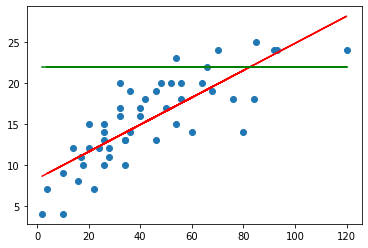

In [26]:
# graficamos los resultados y las estimaciones las ponesmos en un línea solida color rojo

plt.scatter(X, Y)
plt.plot(X, yhat, color='red')
plt.plot(X, v_y_barr, color='green')

In [44]:
#Calculamos el error de estimación

errors = Y - yhat

In [45]:
errors

array([-4.61504079, -5.93958139, -1.94617594, -4.92639228, -2.93298684,
       -0.93958139, -1.26412199, -2.58866258, -3.91320318, -0.09855441,
       -1.91979773,  1.39814831,  0.40474287, -0.25752743, -0.91979773,
        0.41133742, -0.91320318, -0.91320318, -2.90001408,  1.41133742,
       -0.24433833, -4.21796012, -7.52931161,  3.40474287,  2.41133742,
       -2.22455467,  2.41793197,  1.09339137,  3.41793197,  2.09339137,
        0.43771563,  2.76225622,  0.44431018, -2.86704131, -4.19158191,
        4.75566167,  3.09998592, -0.54250072,  6.41793197,  3.76885078,
        3.10658048,  2.44431018,  1.11976958,  2.78863443,  5.77544533,
        4.12636413,  0.48387749,  0.31830992, -4.1520146 ,  2.64285051])

In [46]:
# Calculamos el error éstandar

std_error = np.std(errors, ddof=1) / np.sqrt(np.size(errors))
print(std_error)

0.4417133840136779


In [ ]:
#MAPE: Mean average percentage error
#MAE: Mean Avarage ERROR

# ---------------------------------------------------------------------
# ESTIMACIÓN DE LOS COEFICIENTES DE REGRESIÓN UTILIZANDO SKLEARN
# ---------------------------------------------------------------------

In [27]:
#Sklearn es una libreria éstandar para el desarrollo de modelos líneales y de machine learning
from sklearn.linear_model import LinearRegression

In [28]:
#regression => es una clase que contine todos los atributos para construir un modelo, después vamos a ir descubriendo como ir llamando a esos objetos
#np.newxis => creará una nueva columna dentro de nustra matríz X original
#para que el modelo se pueda generar tenemos que llamar al objeto "fit"

regression = LinearRegression()
linear_model = regression.fit(X[:,np.newaxis],Y)

In [29]:
print(linear_model.intercept_)

8.283905641787172


In [30]:
print(linear_model.coef_)

[0.16556757]


In [31]:
beta_hat

array([8.28390564, 0.16556757])

In [32]:
#Para realizar predicciones tenemos que invocar al objeto predict y hacerle pasar el dataset de entrenamiento
#notese que la estructura del dataset de entrenamiento debe ser de la misma estructura del dataset que utilizamos para construir el modelo

linear_model.predict(X[:,np.newaxis])

array([ 8.61504079,  9.93958139,  8.94617594, 11.92639228, 10.93298684,
        9.93958139, 11.26412199, 12.58866258, 13.91320318, 11.09855441,
       12.91979773, 10.60185169, 11.59525713, 12.25752743, 12.91979773,
       12.58866258, 13.91320318, 13.91320318, 15.90001408, 12.58866258,
       14.24433833, 18.21796012, 21.52931161, 11.59525713, 12.58866258,
       17.22455467, 13.58206803, 14.90660863, 13.58206803, 14.90660863,
       16.56228437, 15.23774378, 17.55568982, 20.86704131, 22.19158191,
       14.24433833, 15.90001408, 19.54250072, 13.58206803, 16.23114922,
       16.89341952, 17.55568982, 18.88023042, 19.21136557, 17.22455467,
       19.87363587, 23.51612251, 23.68169008, 28.1520146 , 22.35714949])

In [33]:
y_hat_skl=linear_model.predict(X[:,np.newaxis])

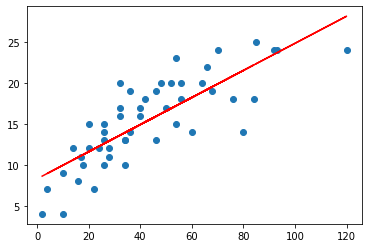

In [34]:
# graficamos los resultados y las estimaciones las ponesmos en un línea solida color rojo

plt.scatter(X, Y)
plt.plot(X, y_hat_skl, color='red')

In [41]:
#Calculamos el error de estimación

errors_skl = Y - y_hat_skl

In [42]:
# Calculamos el error éstandar

std_error_skl = np.std(errors_skl, ddof=1) / np.sqrt(np.size(errors_skl))
print(std_error_skl)

0.4417133840136779


In [47]:
#Comparamos el error estandar de ambos métodos y vemos que regresa los mismos resultados
print(std_error)
print(std_error_skl)

0.4417133840136779
0.4417133840136779


# ---------------------------------------------------------------------
# ESTIMACIÓN DE LOS COEFICIENTES DE REGRESIÓN UTILIZANDO STATMODELS
# ---------------------------------------------------------------------

In [48]:
#Importamos la librería de StatModels
import statsmodels.api as sm

In [49]:
X_mat[0:5]
#Recordemos que esta matriz ya incluye la primer columna

array([[ 1.,  2.],
       [ 1., 10.],
       [ 1.,  4.],
       [ 1., 22.],
       [ 1., 16.]])

In [50]:
#Utilizaremos el método de Ordinary Least Squares (OLS) o Mínimos Cuadrados Ordinarios (MCO)
linear_model_sm = sm.OLS(Y, X_mat).fit()

In [51]:
#A diferencia de SKLEARN, StatModels es una libreria de estimación estadística, SKLEARN no arrojará estas salidas

sm_reg_lin_summary = linear_model_sm.summary()
print(sm_reg_lin_summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           1.49e-12
Time:                        03:53:29   Log-Likelihood:                -127.39
No. Observations:                  50   AIC:                             258.8
Df Residuals:                      48   BIC:                             262.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2839      0.874      9.474      0.0

In [52]:
#Generamos las predicciones con StatModels
#No olvidemos que los valores de predicción deben tener la misma que la matriz de evaluación

y_hat_sm = linear_model_sm.predict(X_mat)

In [53]:
#Calculamos el error de estimación

errors_sm = Y - y_hat_sm

In [54]:
# Calculamos el error éstandar

std_error_sm = np.std(errors_sm, ddof=1) / np.sqrt(np.size(errors_sm))
print(std_error_sm)

0.4417133840136779


In [55]:
#Comparamos el error estandar de ambos métodos y vemos que regresa los mismos resultados
print(std_error)
print(std_error_skl)
print(std_error_sm)

0.4417133840136779
0.4417133840136779
0.4417133840136779
